In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
df = pd.read_csv('USA_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401066 entries, 0 to 1401065
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1401066 non-null  object 
 1   bed             1184538 non-null  float64
 2   bath            1206853 non-null  float64
 3   acre_lot        1043599 non-null  float64
 4   city            1400875 non-null  object 
 5   state           1401066 non-null  object 
 6   zip_code        1400587 non-null  float64
 7   house_size      950954 non-null   float64
 8   prev_sold_date  714773 non-null   object 
 9   price           1400958 non-null  float64
dtypes: float64(6), object(4)
memory usage: 106.9+ MB


## Null Percentage

In [238]:
nulls_percent = df.isnull().sum()*100 / df.shape[0]
print(nulls_percent)

status             0.000000
bed               15.454518
bath              13.861802
acre_lot          25.513930
city               0.013632
state              0.000000
zip_code           0.034188
house_size        32.126395
prev_sold_date    48.983631
price              0.007708
dtype: float64


 No feature has a null percentage >=70% which means that the missing values can be dealt with rather than eliminating the coloumn from the dataset 

## Unique Values

In [239]:
print("Num of status: ",len(df["status"].unique()))
print("Num of cities: ",len(df["city"].unique()))
print("Num of states: ",len(df["state"].unique()))
print("Num of zipcodes: ",len(df["zip_code"].unique()))

Num of status:  2
Num of cities:  3513
Num of states:  19
Num of zipcodes:  4221


These statistics will be useful for encoding the categorical data (OHE)

## Correlation

In [240]:
for i in df.columns[:9] :
    if df[i].dtype != "object":
        print("Correlation between",i, "and the label \"price\": ", round(df[i].corr(df["price"])*100,2))

Correlation between bed and the label "price":  16.67
Correlation between bath and the label "price":  27.9
Correlation between acre_lot and the label "price":  -0.26
Correlation between zip_code and the label "price":  0.48
Correlation between house_size and the label "price":  13.48


No high correlations exist between the features and the label, so none will be redundant features. It is important to note that there exists a high correlation between the city,state and the zipcode as the city and the state are could be determined through the zip code. This will be dealt with later on.

## Removing Redundancies and Outliers

### Redundancies

In [241]:
print(df["status"].value_counts())
print()
avg_price_status = df.groupby("status")["price"].mean()
print("Averge price by status:")
print(avg_price_status)

status
for_sale          1399134
ready_to_build       1932
Name: count, dtype: int64

Averge price by status:
status
for_sale          818471.244103
ready_to_build    917575.797958
Name: price, dtype: float64


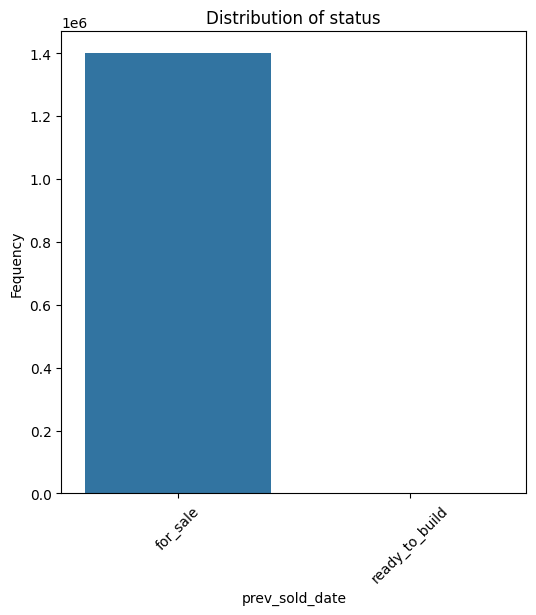

In [242]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x= df["status"])
plt.title('Distribution of ' + df["status"].name)
plt.xlabel(i)
plt.ylabel('Fequency')
plt.xticks(rotation=45)
plt.show()


As can be seen, the number of "ready_to_build" data points is much less than the number of "for_sale" to build. It can also be seen that the status does not have an effect on the price though the avergae price by status calculated. Thus, we can remove the "ready_to_build" data points and after doing so the whole coloumn would be redundant as it will only contain one value which is "for_sale".

In [243]:
original_length = len(df)
print("Original length: ", original_length)
try:
    df.drop(df[df["status"] == "ready_to_build"].index, axis = 0, inplace=True)
except Exception as e:
    print(e)
new_length = len(df)
print("New length: ", new_length)
print(original_length - new_length, "rows were removed")

Original length:  1401066
New length:  1399134
1932 rows were removed


In [244]:
df.drop(["status"], axis=1, inplace=True)
print(len(df.columns))


9


In [245]:
df.head()

,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


### Outliers

In [246]:
# fixing data types
df["bed"] = df["bed"].convert_dtypes(int)
df["bath"] = df["bath"].convert_dtypes(int)
df["acre_lot"] = df["acre_lot"].convert_dtypes(float)
df["zip_code"] = df["zip_code"].convert_dtypes(int)

df['zip_code'] = df['zip_code'].astype(str).fillna('')
df['zip_code'] = df['zip_code'].apply(lambda x: x.zfill(5))  

# check for null zipcodes -> 0<NA> not if not ot '' 

df.info()
df.head()

# draw scatter graph between every feature and the label "price"

# find outliers


# Iterate over the columns of the DataFrame



<class 'pandas.core.frame.DataFrame'>
Index: 1399134 entries, 0 to 1401065
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   bed             1182606 non-null  Int64  
 1   bath            1206853 non-null  Int64  
 2   acre_lot        1043599 non-null  Float64
 3   city            1398943 non-null  object 
 4   state           1399134 non-null  object 
 5   zip_code        1399134 non-null  object 
 6   house_size      949022 non-null   float64
 7   prev_sold_date  714773 non-null   object 
 8   price           1399097 non-null  float64
dtypes: Float64(1), Int64(2), float64(2), object(4)
memory usage: 110.7+ MB


,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,3,2,0.12,Adjuntas,Puerto Rico,00601,920.0,NaN,105000.0
1,4,2,0.08,Adjuntas,Puerto Rico,00601,1527.0,NaN,80000.0
2,2,1,0.15,Juana Diaz,Puerto Rico,00795,748.0,NaN,67000.0
3,4,2,0.1,Ponce,Puerto Rico,00731,1800.0,NaN,145000.0
4,6,2,0.05,Mayaguez,Puerto Rico,00680,NaN,NaN,65000.0


In [247]:
nulls_percent = df.isnull().sum()*100 / df.shape[0]
print(nulls_percent)

bed               15.475859
bath              13.742858
acre_lot          25.411076
city               0.013651
state              0.000000
zip_code           0.000000
house_size        32.170757
prev_sold_date    48.913185
price              0.002644
dtype: float64


In [252]:
print(df[df["zip_code"]=='0<NA>'])

          bed  bath  acre_lot         city        state zip_code  house_size  \
679         3     1      0.05        Ponce  Puerto Rico    0<NA>       790.0   
917         3     1      0.05        Ponce  Puerto Rico    0<NA>       790.0   
1022        3     1      0.05        Ponce  Puerto Rico    0<NA>       790.0   
1195     <NA>  <NA>       1.4       Rincon  Puerto Rico    0<NA>         NaN   
1451        3     1      0.05        Ponce  Puerto Rico    0<NA>       790.0   
...       ...   ...       ...          ...          ...      ...         ...   
1387546  <NA>  <NA>      9.46  Anderson Rd     New York    0<NA>         NaN   
1388009  <NA>  <NA>      30.0    Spisak Rd     New York    0<NA>         NaN   
1389490  <NA>  <NA>      30.0    Spisak Rd     New York    0<NA>         NaN   
1392619     5     2     200.0          NaN     New York    0<NA>      3136.0   
1392814  <NA>  <NA>     53.51        Andes     New York    0<NA>         NaN   

        prev_sold_date     price  
679 

In [249]:
df.to_csv('Cleaned_Dataset.csv', index=False)

In [250]:
len(df)

1399134